In [1]:
import pandas as pd

In [29]:
df = pd.read_csv('archive/ETH_1H.csv')
df.head(5)

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1586995200000,2020-04-16 00:00:00,ETHUSD,152.94,152.94,150.39,150.39,650.188125
1,1586991600000,2020-04-15 23:00:00,ETHUSD,155.81,155.81,151.39,152.94,4277.567299
2,1586988000000,2020-04-15 22:00:00,ETHUSD,157.18,157.30,155.32,155.81,106.337279
3,1586984400000,2020-04-15 21:00:00,ETHUSD,158.04,158.31,157.16,157.18,55.244131
4,1586980800000,2020-04-15 20:00:00,ETHUSD,157.10,158.10,156.87,158.04,144.262622


In [13]:
df.shape

(34497, 8)

In [16]:
df.loc[0, 'Date'].day_name()

AttributeError: 'str' object has no attribute 'day_name'

In [24]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %X')

# format='%Y-%m-%d %I-%p')
# this csv donr need format becaus its OK just sdd Code for ephasize

# 2020-04-16 PM-7
# format='%Y-%m-%d %I-%p'

In [25]:
df.loc[0, 'Date'].day_name()

'Thursday'

In [26]:
df.loc[0, 'Date']

Timestamp('2020-04-16 00:00:00')

In [2]:
parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %X')
df = pd.read_csv('archive/ETH_1H.csv', parse_dates=['Date'], date_parser=parser)
df.drop(columns='Unix Timestamp', inplace=True)
df.head(5)

/var/folders/t4/zdyms2z53151dg_6ktts7gv80000gn/T/ipykernel_736/1552654348.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %X')


,Date,Symbol,Open,High,Low,Close,Volume
0,2020-04-16 00:00:00,ETHUSD,152.94,152.94,150.39,150.39,650.188125
1,2020-04-15 23:00:00,ETHUSD,155.81,155.81,151.39,152.94,4277.567299
2,2020-04-15 22:00:00,ETHUSD,157.18,157.30,155.32,155.81,106.337279
3,2020-04-15 21:00:00,ETHUSD,158.04,158.31,157.16,157.18,55.244131
4,2020-04-15 20:00:00,ETHUSD,157.10,158.10,156.87,158.04,144.262622


In [10]:
df.loc[0, 'Date'].day_name()

'Thursday'

In [11]:
df['Date']

0       2020-04-16 00:00:00
1       2020-04-15 23:00:00
2       2020-04-15 22:00:00
3       2020-04-15 21:00:00
4       2020-04-15 20:00:00
                ...        
34492   2016-05-09 17:00:00
34493   2016-05-09 16:00:00
34494   2016-05-09 15:00:00
34495   2016-05-09 14:00:00
34496   2016-05-09 13:00:00
Name: Date, Length: 34497, dtype: datetime64[ns]

In [12]:
df['Date'].dt.day_name()     #dt in series is like access str class

0         Thursday
1        Wednesday
2        Wednesday
3        Wednesday
4        Wednesday
           ...    
34492       Monday
34493       Monday
34494       Monday
34495       Monday
34496       Monday
Name: Date, Length: 34497, dtype: object

In [13]:
df['DayOfWeak'] = df['Date'].dt.day_name()
df

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeak
0,2020-04-16 00:00:00,ETHUSD,152.94,152.94,150.39,150.39,650.188125,Thursday
1,2020-04-15 23:00:00,ETHUSD,155.81,155.81,151.39,152.94,4277.567299,Wednesday
2,2020-04-15 22:00:00,ETHUSD,157.18,157.30,155.32,155.81,106.337279,Wednesday
3,2020-04-15 21:00:00,ETHUSD,158.04,158.31,157.16,157.18,55.244131,Wednesday
4,2020-04-15 20:00:00,ETHUSD,157.10,158.10,156.87,158.04,144.262622,Wednesday
...,...,...,...,...,...,...,...,...
34492,2016-05-09 17:00:00,ETHUSD,9.83,9.83,9.48,9.49,329.553213,Monday
34493,2016-05-09 16:00:00,ETHUSD,9.99,9.99,9.79,9.83,62.379450,Monday
34494,2016-05-09 15:00:00,ETHUSD,10.00,10.00,9.99,9.99,10.973567,Monday
34495,2016-05-09 14:00:00,ETHUSD,9.55,10.00,9.55,10.00,235.774075,Monday


In [14]:
df['Date'].min()

Timestamp('2016-05-09 13:00:00')

In [15]:
df['Date'].max()

Timestamp('2020-04-16 00:00:00')

In [16]:
df['Date'].max() - df['Date'].min()

Timedelta('1437 days 11:00:00')

In [17]:
filt = (df['Date'] >= '2019') & (df['Date'] < '2020')
df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeak
2545,2019-12-31 23:00:00,ETHUSD,128.68,128.85,127.82,128.84,857.650259,Tuesday
2546,2019-12-31 22:00:00,ETHUSD,128.40,128.93,127.77,128.68,3050.507350,Tuesday
2547,2019-12-31 21:00:00,ETHUSD,127.87,128.41,127.81,128.40,447.680372,Tuesday
2548,2019-12-31 20:00:00,ETHUSD,127.86,128.30,127.86,127.87,151.711128,Tuesday
2549,2019-12-31 19:00:00,ETHUSD,128.78,128.78,127.86,127.86,2450.933248,Tuesday
...,...,...,...,...,...,...,...,...
11297,2019-01-01 04:00:00,ETHUSD,130.83,133.75,130.83,132.09,1035.840465,Tuesday
11298,2019-01-01 03:00:00,ETHUSD,129.79,131.00,129.79,130.83,1307.299291,Tuesday
11299,2019-01-01 02:00:00,ETHUSD,130.98,130.98,129.25,129.79,837.808380,Tuesday
11300,2019-01-01 01:00:00,ETHUSD,131.10,131.10,128.72,130.98,965.092541,Tuesday


In [18]:
filt2 = (df['Date'] == 2019)
df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeak
2545,2019-12-31 23:00:00,ETHUSD,128.68,128.85,127.82,128.84,857.650259,Tuesday
2546,2019-12-31 22:00:00,ETHUSD,128.40,128.93,127.77,128.68,3050.507350,Tuesday
2547,2019-12-31 21:00:00,ETHUSD,127.87,128.41,127.81,128.40,447.680372,Tuesday
2548,2019-12-31 20:00:00,ETHUSD,127.86,128.30,127.86,127.87,151.711128,Tuesday
2549,2019-12-31 19:00:00,ETHUSD,128.78,128.78,127.86,127.86,2450.933248,Tuesday
...,...,...,...,...,...,...,...,...
11297,2019-01-01 04:00:00,ETHUSD,130.83,133.75,130.83,132.09,1035.840465,Tuesday
11298,2019-01-01 03:00:00,ETHUSD,129.79,131.00,129.79,130.83,1307.299291,Tuesday
11299,2019-01-01 02:00:00,ETHUSD,130.98,130.98,129.25,129.79,837.808380,Tuesday
11300,2019-01-01 01:00:00,ETHUSD,131.10,131.10,128.72,130.98,965.092541,Tuesday


In [19]:
filt3 = (df['Date'] >= pd.to_datetime('2019-01-01')) & (df['Date'] < pd.to_datetime('2019-03-07'))
df.loc[filt3]

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeak
9742,2019-03-06 23:00:00,ETHUSD,137.16,137.59,137.03,137.03,770.229294,Wednesday
9743,2019-03-06 22:00:00,ETHUSD,136.63,137.19,136.36,137.16,499.220404,Wednesday
9744,2019-03-06 21:00:00,ETHUSD,136.20,137.49,135.81,136.63,2962.219846,Wednesday
9745,2019-03-06 20:00:00,ETHUSD,136.43,136.66,136.09,136.20,175.882394,Wednesday
9746,2019-03-06 19:00:00,ETHUSD,136.58,137.10,136.43,136.43,340.799538,Wednesday
...,...,...,...,...,...,...,...,...
11297,2019-01-01 04:00:00,ETHUSD,130.83,133.75,130.83,132.09,1035.840465,Tuesday
11298,2019-01-01 03:00:00,ETHUSD,129.79,131.00,129.79,130.83,1307.299291,Tuesday
11299,2019-01-01 02:00:00,ETHUSD,130.98,130.98,129.25,129.79,837.808380,Tuesday
11300,2019-01-01 01:00:00,ETHUSD,131.10,131.10,128.72,130.98,965.092541,Tuesday


In [20]:
df.set_index('Date', inplace=True)

In [21]:
df.loc['2019']  # df['2019']

,Symbol,Open,High,Low,Close,Volume,DayOfWeak
Date,,,,,,,
2019-12-31 23:00:00,ETHUSD,128.68,128.85,127.82,128.84,857.650259,Tuesday
2019-12-31 22:00:00,ETHUSD,128.40,128.93,127.77,128.68,3050.507350,Tuesday
2019-12-31 21:00:00,ETHUSD,127.87,128.41,127.81,128.40,447.680372,Tuesday
2019-12-31 20:00:00,ETHUSD,127.86,128.30,127.86,127.87,151.711128,Tuesday
2019-12-31 19:00:00,ETHUSD,128.78,128.78,127.86,127.86,2450.933248,Tuesday
...,...,...,...,...,...,...,...
2019-01-01 04:00:00,ETHUSD,130.83,133.75,130.83,132.09,1035.840465,Tuesday
2019-01-01 03:00:00,ETHUSD,129.79,131.00,129.79,130.83,1307.299291,Tuesday
2019-01-01 02:00:00,ETHUSD,130.98,130.98,129.25,129.79,837.808380,Tuesday


In [22]:
df.loc['2020-01':'2020-03'] 

,Symbol,Open,High,Low,Close,Volume,DayOfWeak
Date,,,,,,,
2020-03-01 00:00:00,ETHUSD,217.35,221.00,216.62,218.09,965.771245,Sunday
2020-02-29 23:00:00,ETHUSD,222.93,223.96,217.26,217.35,1247.560462,Saturday
2020-02-29 22:00:00,ETHUSD,223.59,223.76,222.32,222.93,118.446008,Saturday
2020-02-29 21:00:00,ETHUSD,224.81,225.08,223.05,223.59,191.602533,Saturday
2020-02-29 20:00:00,ETHUSD,225.56,225.56,223.55,224.81,158.232905,Saturday
...,...,...,...,...,...,...,...
2020-02-01 04:00:00,ETHUSD,182.65,183.42,181.86,182.03,61.277147,Saturday
2020-02-01 03:00:00,ETHUSD,183.20,183.51,182.63,182.65,35.431896,Saturday
2020-02-01 02:00:00,ETHUSD,183.21,184.05,182.98,183.20,285.663975,Saturday


In [23]:
df.loc['2020-01-01':'2020-01-03']['Close']

Date
2020-01-03 00:00:00    126.79
2020-01-02 23:00:00    126.83
2020-01-02 22:00:00    126.92
2020-01-02 21:00:00    127.32
2020-01-02 20:00:00    126.93
2020-01-02 19:00:00    127.29
2020-01-02 18:00:00    127.23
2020-01-02 17:00:00    127.03
2020-01-02 16:00:00    127.25
2020-01-02 15:00:00    129.39
2020-01-02 14:00:00    129.05
2020-01-02 13:00:00    128.98
2020-01-02 12:00:00    129.59
2020-01-02 11:00:00    129.18
2020-01-02 10:00:00    129.31
2020-01-02 09:00:00    129.23
2020-01-02 08:00:00    129.76
2020-01-02 07:00:00    129.11
2020-01-02 06:00:00    128.65
2020-01-02 05:00:00    129.02
2020-01-02 04:00:00    129.07
2020-01-02 03:00:00    128.62
2020-01-02 02:00:00    129.37
2020-01-02 01:00:00    129.75
2020-01-02 00:00:00    130.14
Name: Close, dtype: float64

In [24]:
df.loc['2020-01-01']['High']

Date
2020-01-01 23:00:00    130.25
2020-01-01 22:00:00    131.31
2020-01-01 21:00:00    131.92
2020-01-01 20:00:00    131.74
2020-01-01 19:00:00    131.71
2020-01-01 18:00:00    132.10
2020-01-01 17:00:00    132.57
2020-01-01 16:00:00    132.52
2020-01-01 15:00:00    131.86
2020-01-01 14:00:00    131.90
2020-01-01 13:00:00    131.59
2020-01-01 12:00:00    131.27
2020-01-01 11:00:00    131.46
2020-01-01 10:00:00    130.47
2020-01-01 09:00:00    130.23
2020-01-01 08:00:00    129.96
2020-01-01 07:00:00    130.35
2020-01-01 06:00:00    130.31
2020-01-01 05:00:00    129.92
2020-01-01 04:00:00    129.96
2020-01-01 03:00:00    130.30
2020-01-01 02:00:00    130.58
2020-01-01 01:00:00    130.01
2020-01-01 00:00:00    128.84
Name: High, dtype: float64

In [25]:
df.loc['2020-01-01']['High'].max()

132.57

In [26]:
highs = df['High'].resample('D').max()       # W D h m
highs

Date
2016-05-09     12.00
2016-05-10      9.96
2016-05-11     10.47
2016-05-12     12.00
2016-05-13     11.59
               ...  
2020-04-12    165.37
2020-04-13    159.51
2020-04-14    162.15
2020-04-15    161.52
2020-04-16    152.94
Freq: D, Name: High, Length: 1439, dtype: float64

In [32]:
a = df.resample('D').max()
a

,Symbol,Open,High,Low,Close,Volume,DayOfWeak
Date,,,,,,,
2016-05-09,ETHUSD,10.00,12.00,9.99,10.00,432.562115,Monday
2016-05-10,ETHUSD,9.95,9.96,9.93,9.95,114.000000,Tuesday
2016-05-11,ETHUSD,10.46,10.47,9.97,10.46,1188.035235,Wednesday
2016-05-12,ETHUSD,11.10,12.00,11.08,11.10,599.528247,Thursday
2016-05-13,ETHUSD,11.59,11.59,11.59,11.59,345.625255,Friday
...,...,...,...,...,...,...,...
2020-04-12,ETHUSD,164.29,165.37,163.74,164.29,2432.183865,Sunday
2020-04-13,ETHUSD,158.56,159.51,156.90,157.90,3503.802110,Monday
2020-04-14,ETHUSD,161.72,162.15,159.84,161.72,3450.096496,Tuesday


In [70]:
highs['2020-01-01']

132.57

In [74]:
%matplotlib inline

<AxesSubplot:xlabel='Date'>

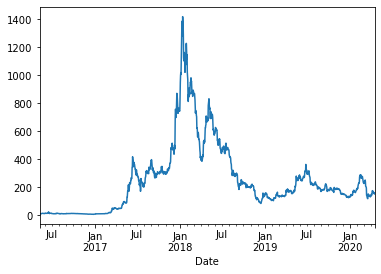

In [75]:
highs.plot()

In [33]:
df.resample('W').agg({'Open':'mean', 'High':'max', 'Low':'min', 'Close':'mean', 'Volume':'sum'})

,Open,High,Low,Close,Volume
Date,,,,,
2016-05-15,10.140387,12.00,0.00,10.205290,10988.942273
2016-05-22,13.042262,14.77,10.06,13.066964,40673.495362
2016-05-29,12.481012,14.43,10.41,12.471012,58051.809091
2016-06-05,13.586369,16.05,12.41,13.594583,47351.544496
2016-06-12,14.287500,15.75,13.83,14.297798,52002.171838
...,...,...,...,...,...
2020-03-22,124.640952,153.17,100.70,124.636012,439980.283707
2020-03-29,133.274762,144.14,119.17,133.285893,230941.584515
2020-04-05,137.517083,150.32,124.09,137.627440,151022.864981


In [35]:
a = df.resample('W').agg({'Open':'mean', 'High':'max', 'Low':'min', 'Close':'mean', 'Volume':'sum'})

pd.DataFrame.to_csv(a, '/Users/mhd/Desktop/eht.csv')